# Respondiendo Preguntas

## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import plotly.express as px
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator

## Estilo de Gráficas

In [2]:
%matplotlib inline

# tamaño de los graficos
sns.set(
    rc={
        'figure.figsize':(10, 5)
    }
)

# estilo de los graficos
sns.set_style('whitegrid')


## Carga de datos

In [3]:
df = pd.read_csv('../data/data_clear.csv')
df

Date      Day  Num_Day Month  Num_Month  Year      Time   Author  \
0     20/11/2021   Sabado       20   Nov         11  2021  15:37:00   user 0   
1     20/11/2021   Sabado       20   Nov         11  2021  15:53:00   user 1   
2     20/11/2021   Sabado       20   Nov         11  2021  15:57:00   user 2   
3     20/11/2021   Sabado       20   Nov         11  2021  16:20:00   user 3   
4     20/11/2021   Sabado       20   Nov         11  2021  16:26:00   user 4   
...          ...      ...      ...   ...        ...   ...       ...      ...   
8257  29/04/2022  Viernes       29   Abr          4  2022  15:57:00  user 28   
8258  29/04/2022  Viernes       29   Abr          4  2022  17:11:00   user 0   
8259  29/04/2022  Viernes       29   Abr          4  2022  19:50:00   user 0   
8260  29/04/2022  Viernes       29   Abr          4  2022  20:03:00  user 14   
8261  29/04/2022  Viernes       29   Abr          4  2022  20:03:00  user 14   

                                                Message  
0                                  <Multimedia omitido>  
1                                  <Multimedia omitido>  
2                                  <Multimedia omitido>  
3     Buenas tardes!! Tienen el número de la carpint...  
4                                  <Multimedia omitido>  
...                                                 ...  
8257                               <Multimedia omitido>  
8258                               <Multimedia omitido>  
8259                               <Multimedia omitido>  
8260                               <Multimedia omitido>  
8261                               <Multimedia omitido>  

[8262 rows x 9 columns]

## Importar funciones personalizadas

In [4]:
%run utils.ipynb

## 1. Total de Mensajes por cada miembro

In [5]:
# Seleccionamos los 10 miembros con mayor cantidad de mensajes enviados 
# y lo almacenamos en una Serie.
Topper = df['Author'].value_counts().head(10)

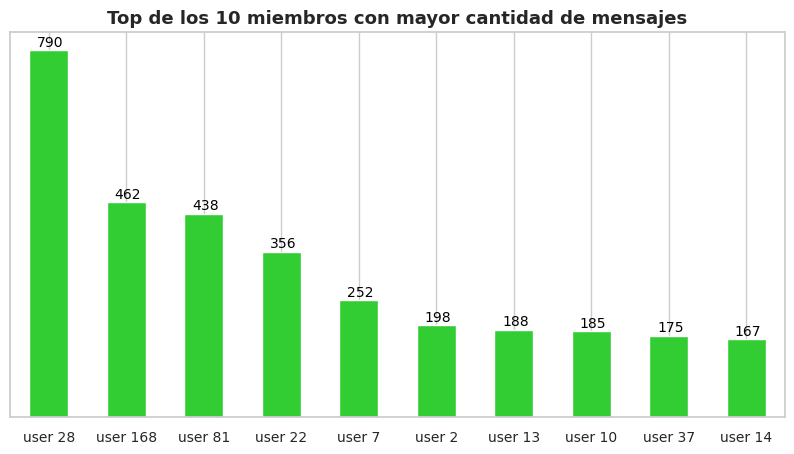

In [6]:
# graficamos los valores de la Serie para visualizar los resultados
Topper.plot.bar(color='#32CD32')

for a,b in enumerate(Topper):
    plt.text(a-.15, b+8, str(b), color='black', fontsize=10)

plt.xticks(rotation=0, size=10)
plt.yticks([])
#plt.xlabel('Miembros del grupo', fontsize=11)
#plt.ylabel('Cantidad de Mensajes', fontsize=11)
plt.title('Top de los 10 miembros con mayor cantidad de mensajes', fontsize=13, fontweight='bold')
plt.show()

## 2. Actividad del chat según el dia

In [7]:
# contamos los registros para cada dia de la semana y lo almacenamos en una serie
active_day = df['Day'].value_counts()

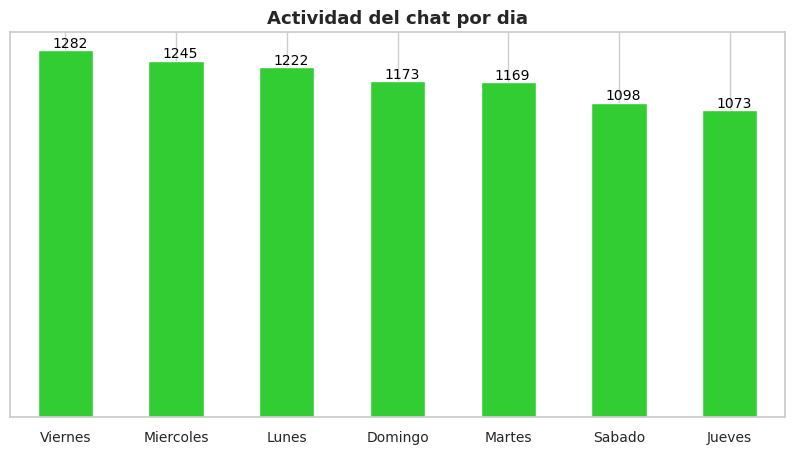

In [8]:
# graficamos la serie para visualizar los resultados
active_day.plot.bar(color='#32CD32')

for a,b in enumerate(active_day):
    plt.text(a-.12, b+10, str(b), color='black', fontsize=10)

plt.xticks(rotation=0, size=10)
plt.yticks([])
plt.title('Actividad del chat por dia', fontsize=13, fontweight='bold')
plt.show()

## 3. Emojis más utilizados en el chat

Debemos tener en cuenta los emojis que representan los tonos de piel para omitirlos y asi obtener los emojis mas representativos 

In [9]:
# lista para almacenar los emojis
emojis = []                     

# lista con los emojis que representan tonos de piel
no_emojis = ['🏻', '🏼', '🪄', '🪛', '🏿']

# recorre los caracteres de cada mensaje
for i in df['Message']:             
    my_str = str(i)
    for j in my_str:
        # si el conjunto de caracteres corresponde a un emoji, se almacena en emojis                    
        if j in emoji.EMOJI_DATA:
            if j not in no_emojis:
                emojis.append(j)

# convertimos la lista en una Serie de Pandas
emo = pd.Series(emojis)

# Seleccionamos los 10 emojis mas utilizados
TopEmoji = emo.value_counts().head(10)

# convertimos la serie en un diccionario
emoji_dict = dict(TopEmoji)

# ordenamos los valores del diccionario
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)

# convertimos el diccionario en un DataFrame
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
            

In [10]:
# graficar lo valores para visualizar los resultados
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Gráfico de los 10 emojis utilizados en el chat')
fig.show()

## 4. Total de Mensajes Multimedia por cada miembro

In [11]:
# Seleccionamos los mensajes que contienen solamente Multimedias y los guardamos en una Serie
MediaValue = df[df['Message'] == '<Multimedia omitido>']

# Contamos los mensajes multimedia de cada miembro y guardamos en una serie
MediaTopper = MediaValue['Author'].value_counts().head(10)

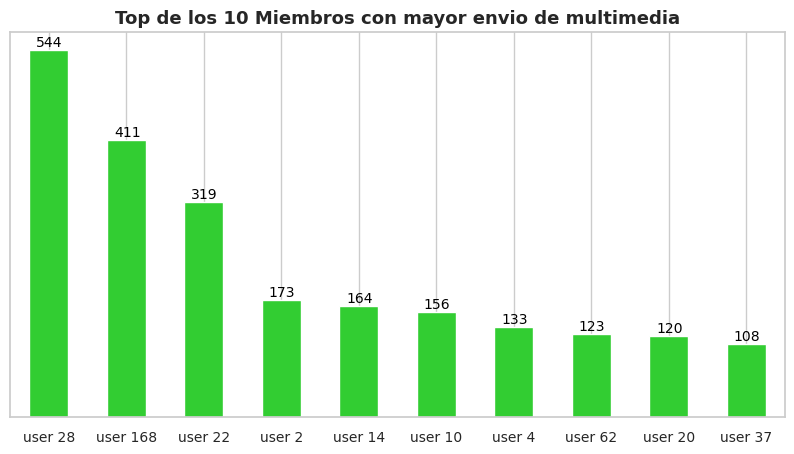

In [12]:
# graficamos la serie para visualizar los resultados
MediaTopper.plot.bar(color='#32CD32')

for a,b in enumerate(MediaTopper):
    plt.text(a-.16, b+5, str(b), color='black', fontsize=10)

plt.xticks(rotation=0, size=10)
plt.yticks([])
plt.title('Top de los 10 Miembros con mayor envio de multimedia', fontsize=13, fontweight='bold')
plt.show()

## 5. Fechas de mayor actividad en el chat

In [13]:
# contamos los mensajes para cada fecha y guardamos en una serie
TopDate = df['Date'].value_counts().head(10)

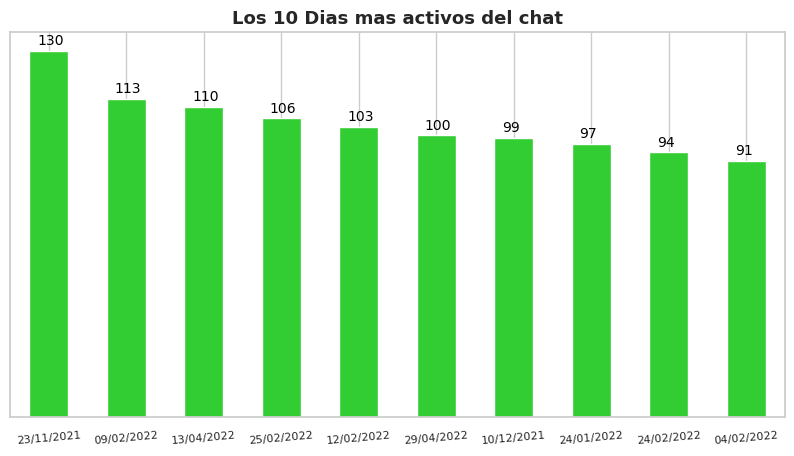

In [14]:
# Graficamos la series para visualizar los resultados
TopDate.plot.bar(color='#32CD32')

for a,b in enumerate(TopDate):
    plt.text(a-.15, b+2, str(b), color='black', fontsize=10)

plt.xticks(rotation=5, size=8,)
plt.yticks([])
plt.title('Los 10 Dias mas activos del chat', fontsize=13, fontweight='bold')
plt.show()

## 6. Total de mensajes por año

In [15]:
# contamos los mensajes por años y lo guardamos en una serie
TopYear = df['Year'].value_counts()

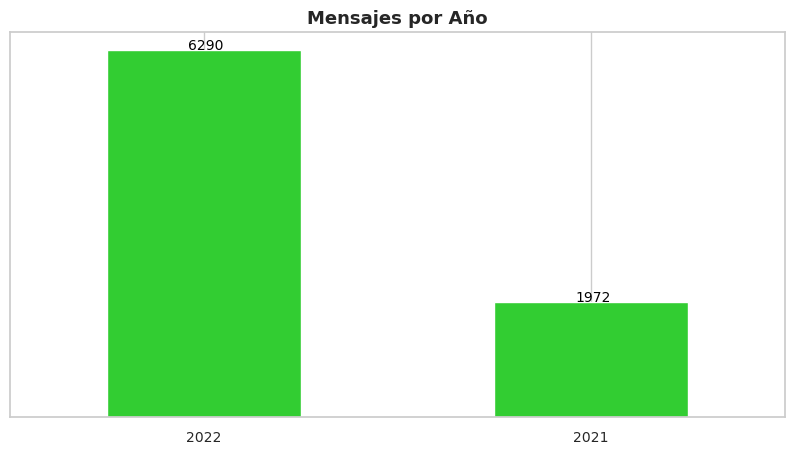

In [16]:
# graficamos la series para visualizar los resultados
TopYear.plot.bar(color='#32CD32')

for a,b in enumerate(TopYear):
    plt.text(a-.04, b+15, str(b), color='black', fontsize=10)

plt.xticks(rotation=0, size=10,)
plt.yticks([])
plt.title('Mensajes por Año', fontsize=13, fontweight='bold')
plt.show()

## 7. Total de mensajes por Mes

In [17]:
# contamos los mensajes segun el mes y lo almacenamos en una serie
TopMonth = df['Month'].value_counts()

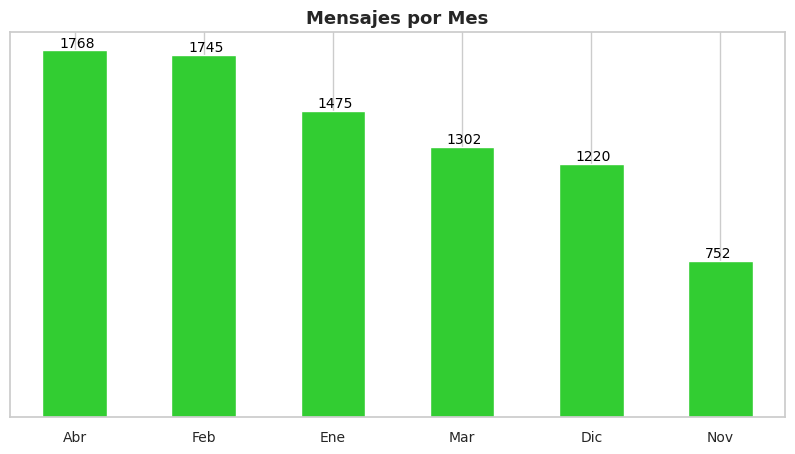

In [18]:
# Graficamos la serie para visualizar los resultados
TopMonth.plot.bar(color='#32CD32')

for a,b in enumerate(TopMonth):
    plt.text(a-.12, b+15, str(b), color='black', fontsize=10)

plt.xticks(rotation=0, size=10,)
plt.yticks([])
plt.title('Mensajes por Mes', fontsize=13, fontweight='bold')
plt.show()

## 8. Horas de mayor actividad en el chat

In [19]:
# Creamos una nueva columna en el dataframe con la hora
df['Hour'] = df['Time'].apply(lambda a:a.split(':')[0])

# Contamos los mensajes por cada hora y almacenamos en una serie
TimeHours = df['Hour'].value_counts().head(10)

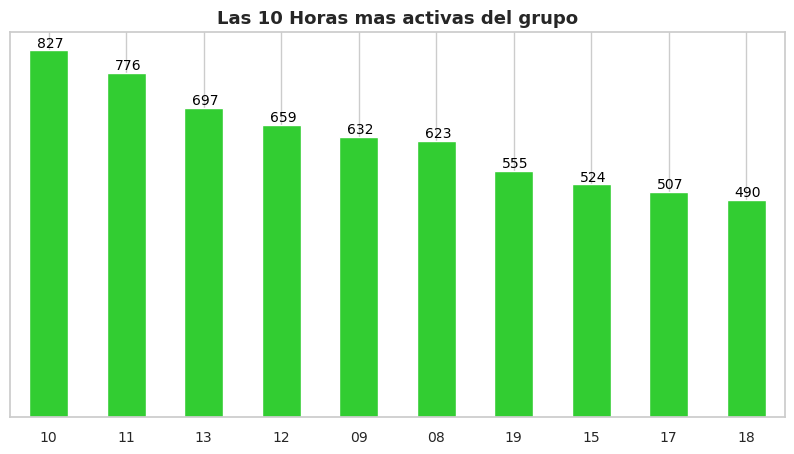

In [20]:
# graficamos la serie para visualizar los resultados
TimeHours.plot.bar(color='#32CD32')

for a,b in enumerate(TimeHours):
    plt.text(a-.15, b+7, str(b), color='black', fontsize=10)

plt.xticks(rotation=0, size=10)
plt.yticks([])
plt.title('Las 10 Horas mas activas del grupo', fontsize=13, fontweight='bold')
plt.show()

## 9. Línea Temporal de mensajes por mes

In [21]:
# Creamos un DataFrame con los mensajes agrupados segun el año, numero de mes y mes
TimeLine = df.groupby(['Year', 'Num_Month', 'Month']).count()['Message'].reset_index()

# agrupamos los valores de Month y Year y guardamos en el DataFrame en una nueva columna
month_timeline = []

for i in range(TimeLine.shape[0]):
    month_timeline.append(TimeLine['Month'][i] + '-' + str(TimeLine['Year'][i]))

TimeLine['Time'] = month_timeline

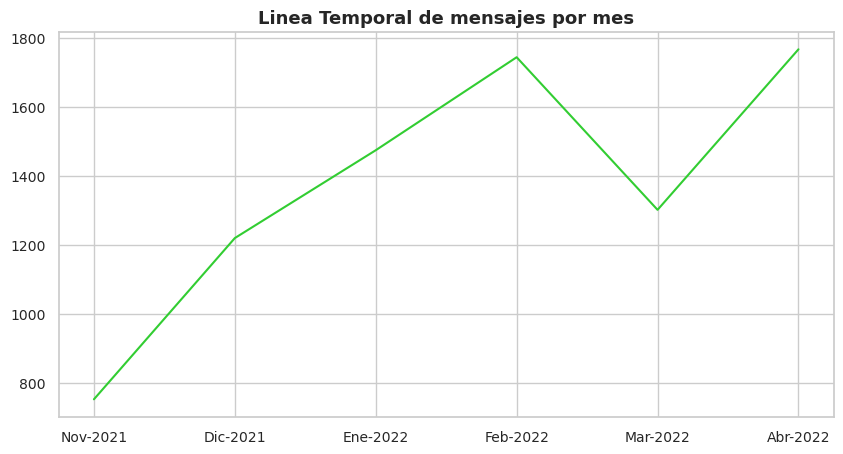

In [22]:
# Graficamos los valores de Message y Time para visualizar resultados
plt.plot(TimeLine['Time'], TimeLine['Message'], color='#32CD32')

plt.xticks(rotation=0, size=10)
plt.yticks(rotation=0, size=10)
plt.title('Linea Temporal de mensajes por mes', fontsize=13, fontweight='bold')
plt.show()

## 10 . Línea Temporal de mensajes por dia

In [23]:
# convertimos las fechas en un objeto datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# cambiamos el formatos de las fechas a Year-Month-Day para luego ordenar correctamente
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

# agrupamos las fechas y su respectiva cantidad de mensajes y guardamos en un dataframe
Daily_LineTime = df.groupby('Date').count()['Message'].reset_index()

# datframe ordenado de mayor a menor segun la cantidad de mensajes
Daily_LineTime_Sort = Daily_LineTime.sort_values(by='Message', ascending=False).reset_index(drop=True)


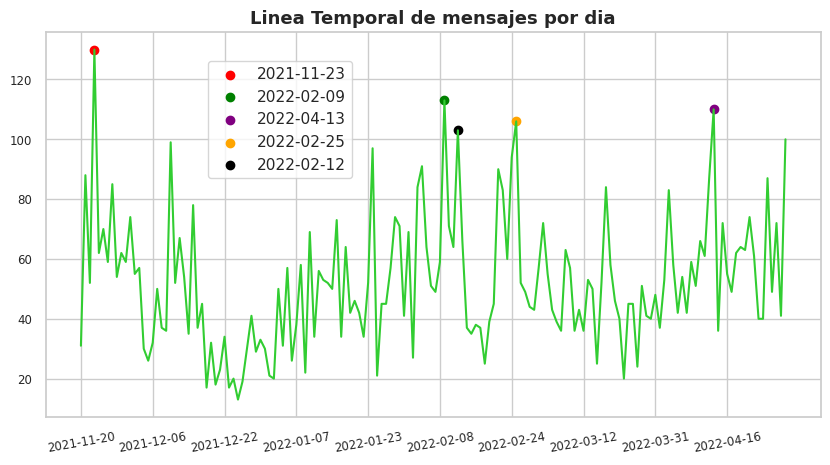

In [24]:
# graficamos los valores de Date y Message de DataFrame para visualizar los resultados
plt.plot(Daily_LineTime['Date'], Daily_LineTime['Message'], color='#32CD32')

plt.xticks(rotation=10, size=8.5)
plt.yticks(rotation=0, size=8.5)
plt.xticks(np.arange(0, Daily_LineTime.shape[0], step=13))
plt.title('Linea Temporal de mensajes por dia', fontsize=13, fontweight='bold')
colores = ['red', 'green', 'purple', 'orange', 'black']

for i in range(5):
    plt.scatter(
        Daily_LineTime_Sort.Date[i], 
        Daily_LineTime_Sort.Message[i], 
        label=str(Daily_LineTime_Sort.Date[i]), 
        color = colores[i],
        marker='o')
            
plt.xticks(np.arange(0, Daily_LineTime.shape[0], step=16))
plt.legend(bbox_to_anchor=(0.2, 0.6))

plt.show()

## 11. De qué se hablaba en el grupo los dias de mayor actividad?

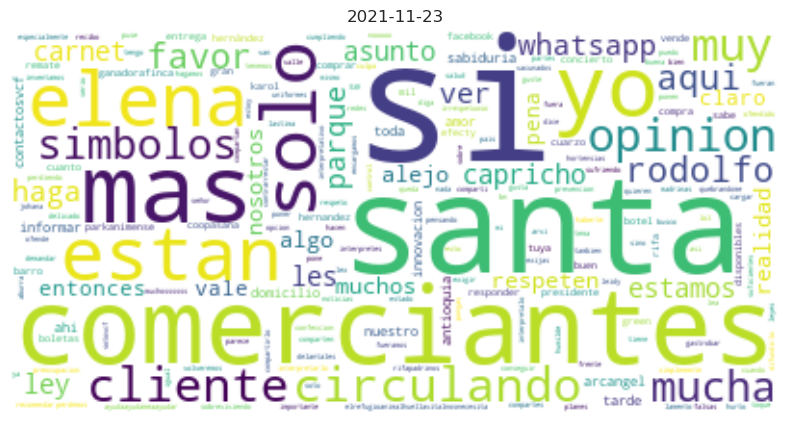

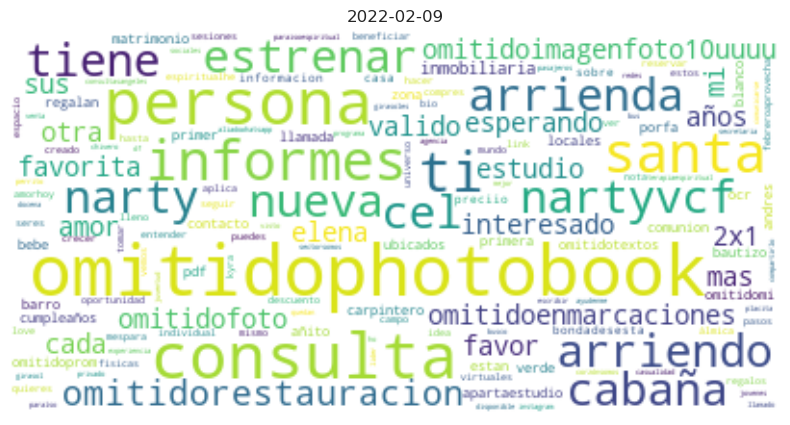

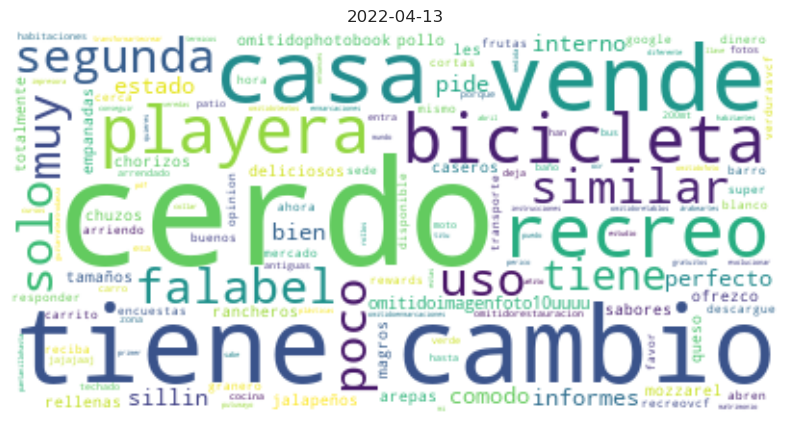

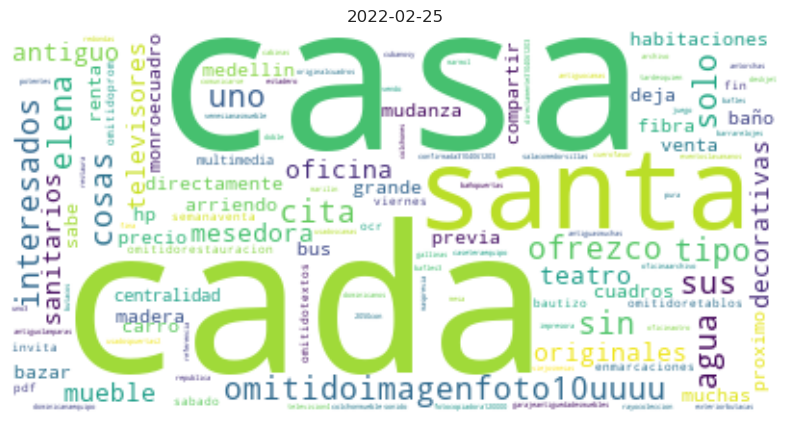

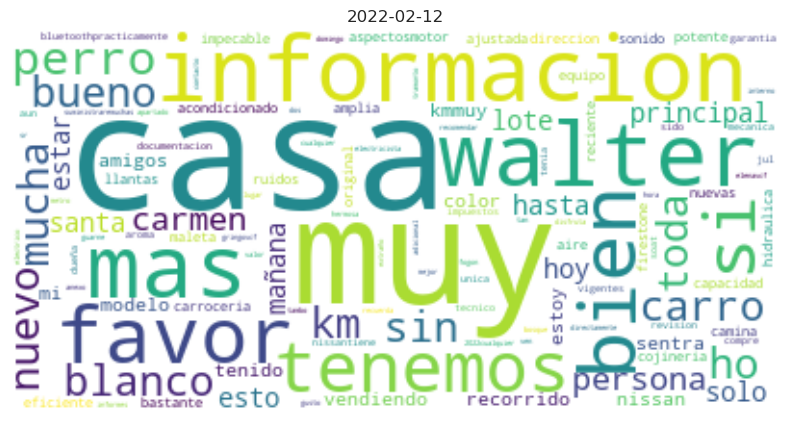

In [25]:
for i in range(5):
    # seleccion de fecha
    fecha = Daily_LineTime_Sort.Date[i]
    
    # seleccion de mensajes con solo texto de la fecha dada
    df_fecha = df[(df['Date'] == fecha) & (df['Message'] != '<Multimedia omitido>')]
    
    # nube de palabras
    Nube_Words(df_fecha, fecha)


## 12. Visualización de actividad en el chat

In [26]:
# agregamos una nueva columna donde vamos a guardar los minutos de las horas
df['Minutes'] = df['Time'].apply(lambda a:a.split(':')[1])

In [27]:
# agregamos una nueva columna al datframe donde guardamos el periodo (la combinacion de horas)
# ejemplo: 6:15 --> 6-7
periodo = []

for hour in df[['Day','Hour']]['Hour']:
    if hour == 23:
        periodo.append(str(hour) + '-' + str('00'))
    elif hour == 0:
        periodo.append(str('00') + '-' + '0' +str(int(hour) + 1))
    else:
        if int(hour) > 8:
            periodo.append(str(hour) + '-' + str(int(hour) + 1))
        else:
            periodo.append(str(hour) + '-' + '0' + str(int(hour) + 1))

df['Periodo'] = periodo

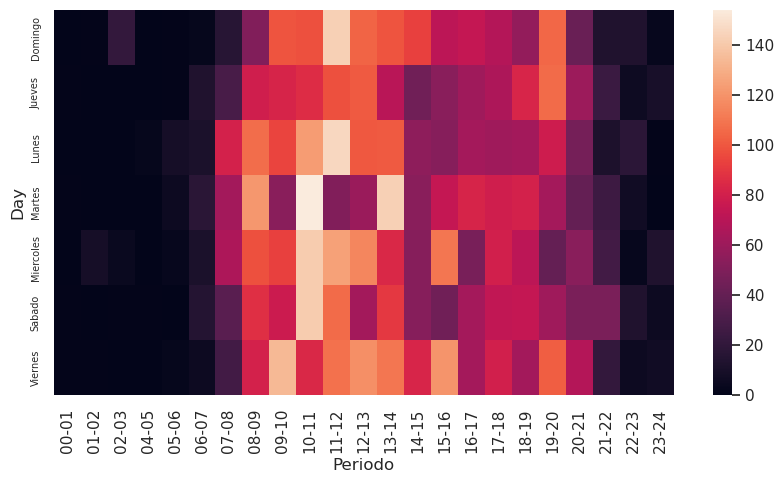

In [28]:
# creamos un heatmap con los dias, periodo y mensajes para visualizar los resultados
sns.heatmap(df.pivot_table(index='Day', columns='Periodo', values='Message', aggfunc='count').fillna(0))

plt.yticks(rotation='vertical', size=7)
plt.show()